In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#import seaborn as sns
#sns.set_theme(style="whitegrid")
#sns.set(font_scale=1.5, rc={'text.usetex' : True})
#sns.set_style("whitegrid", {'xtick.bottom': True , 'ytick.left': True})
#sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma15_1p4"

/tmp/ipykernel_1005488/1975800330.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
df = pd.read_parquet(f"../{STUDY_NAME}/da.parquet")
df = df.round(3)
df

,normalized amplitude in xy-plane,q1,q2,nb,on_x1,oct_current,bunch_nb
name 1,,,,,,,
madx_000,3.938,62.305,60.305,1.400000e+11,250.0,60.0,1963.0
madx_001,3.594,62.305,60.306,1.400000e+11,250.0,60.0,1963.0
madx_002,3.656,62.305,60.307,1.400000e+11,250.0,60.0,1963.0
madx_003,3.719,62.305,60.308,1.400000e+11,250.0,60.0,1963.0
madx_004,3.875,62.305,60.309,1.400000e+11,250.0,60.0,1963.0
...,...,...,...,...,...,...,...
madx_152,8.406,62.311,60.307,1.400000e+11,250.0,60.0,1963.0
madx_153,8.938,62.311,60.308,1.400000e+11,250.0,60.0,1963.0
madx_155,9.469,62.311,60.310,1.400000e+11,250.0,60.0,1963.0


In [3]:
df_to_plot = df.pivot(index  = 'q2', columns = 'q1', values = 'normalized amplitude in xy-plane')
data_array = df_to_plot.to_numpy()
df_to_plot

q1,62.305,62.306,62.307,62.308,62.309,62.310,62.311
q2,,,,,,,
60.305,3.938,3.844,3.969,3.781,4.125,4.688,8.406
60.306,3.594,3.719,4.000,3.875,3.656,6.281,NaN
60.307,3.656,3.562,3.719,3.781,4.156,7.344,8.406
60.308,3.719,3.625,3.469,3.594,3.781,7.344,8.938
60.309,3.875,3.562,3.375,3.750,4.688,7.344,NaN
60.310,3.719,3.844,3.781,3.625,3.750,7.344,9.469
60.311,3.812,3.938,3.906,3.719,4.812,7.875,9.469
60.312,3.875,3.875,3.812,3.719,3.375,9.469,NaN
60.313,3.875,3.906,3.719,3.719,5.094,8.406,NaN


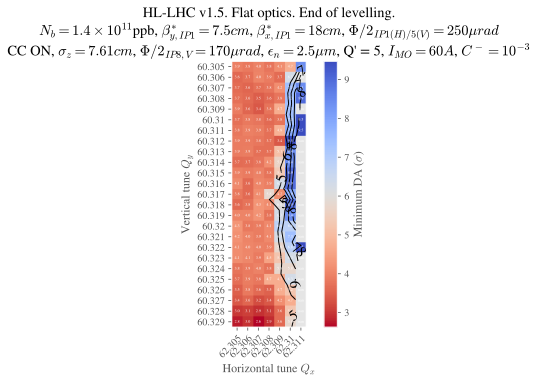

In [4]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str



fig, ax = plt.subplots()
im = ax.imshow(data_array, cmap='coolwarm_r')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(df_to_plot.columns)), labels=df_to_plot.columns)
ax.set_yticks(np.arange(len(df_to_plot.index)), labels=df_to_plot.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#Loop over data dimensions and create text annotations.
for i in range(len(df_to_plot.index)):
    for j in range(len(df_to_plot.columns)):
        text = ax.text(j, i, f"{data_array[i, j]:.1f}",
                       ha="center", va="center", color="w", fontsize=4)
        
#ax = sns.heatmap(df_to_plot, annot=True, fmt=".1f", cmap="coolwarm_r", linewidth=0.00)
CS = ax.contour(np.arange(.5, data_array.shape[1]), np.arange(.5, data_array.shape[0]), data_array, colors='black', levels = [5,6,7,8], linewidths = 1)
ax.clabel(CS, inline=1, fontsize=15)

ax.set_title("Normalized amplitude in xy-plane")
ax.set_title(
    "HL-LHC v1.5. Flat optics. End of levelling."
    + "\n"
    + "$N_b = $"
    + latex_float(df.nb.min())
    + "ppb, "
    + r"$\beta^{*}_{y,IP1} = 7.5cm$"
    + ", "
    + r"$\beta^{*}_{x,IP1} = 18cm$"
    + ", "
    + r"$\Phi/2_{IP1(H)/5(V)} = 250\mu rad$"
    + "\n"
    + "CC ON, " + r"$\sigma_{z} = 7.61cm$" + ", "
    + r"$\Phi/2_{IP8,V} = 170\mu rad$" + ", "
    + r"$\epsilon_{n} = 2.5\mu m$" + ", "
    + r"Q' = 5" + ", " + r"$I_{MO} = 60A$"+ ", " + r"$C^- = 10^{-3}$"
)
ax.set_xlabel("Horizontal tune " + r"$Q_x$")
ax.set_ylabel("Vertical tune " + r"$Q_y$")


# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
plt.grid(visible = None)

plt.savefig('output' + STUDY_NAME + '.pdf')
plt.show()
